In [1]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
import os
from astropy import units as u
from astropy.coordinates import SkyCoord
import traceback
from dataclasses import make_dataclass

from data import get_star_data_df

In [2]:
stars = get_star_data_df()

In [60]:
near = 0.1
far = 1
fov = 90
aspect = 1

S = 1 / np.tan(np.deg2rad(fov/2))
b = (far+near) / (near - far)
c  = (2*far*near) / (near - far)


projection = np.array([
        [S,0,0,0],
        [0,S/aspect,0,0],
        [0,0,b,c],
        [0,0,-1,0],
    ])

def get_values(coord):
    return [coord.cartesian.x, coord.cartesian.y, coord.cartesian.z, 1]

series = stars.coord.apply(get_values)
positions = np.array(series.tolist())
positions[:3]

array([[ 0.70409407,  0.01587055,  0.70992934,  1.        ],
       [ 0.99971743,  0.02209031, -0.00877986,  1.        ],
       [ 0.99477298,  0.02316084, -0.09945   ,  1.        ]])

In [75]:
rot_y = np.deg2rad(45)
cos_y = np.cos(rot_y)
sin_y = np.sin(rot_y)

rot_x = np.deg2rad(93)
cos_x = np.cos(rot_x)
sin_x = np.sin(rot_x)

r_y = np.array([
    [cos_y, 0, sin_y, 0],
    [0, 1, 0, 0],
    [-sin_y, 0, cos_y, 0],
    [0, 0, 0, 1]
])

r_x = np.array([
    [1, 0, 0, 0],
    [0, cos_x, -sin_x, 0],
    [0, sin_x, cos_x, 0],
    [0, 0, 0, 1]
])

rotated_pos = positions@r_y@r_x
rotated_pos[:3]

array([[-0.00412616,  0.99766466, -0.06817772,  1.        ],
       [ 0.71311527,  0.69858227, -0.05873177,  1.        ],
       [ 0.77373249,  0.63100918, -0.05626241,  1.        ]])

In [76]:
result = rotated_pos@projection
result_df = pd.DataFrame(result)

result_df["x"] = result_df[0] / result_df[3]
result_df["y"] = result_df[1] / result_df[3]
result_df["z"] = result_df[2] / result_df[3]

result_df.head(3)

,0,1,2,3,x,y,z
0,-0.004126,0.997665,-0.916672,0.015151,-0.272343,65.849828,-60.503970
1,0.713115,0.698582,-0.928217,0.013052,54.638548,53.525036,-71.119517
2,0.773732,0.631009,-0.931235,0.012503,61.884945,50.469599,-74.482354


In [77]:
in_frame = ((result_df["z"] > -1) & (result_df["z"] < 1)) & ((result_df["x"] > -1) & (result_df["x"] < 1)) & ((result_df["y"] > -1) & (result_df["y"] < 1))
visible = result_df[in_frame]
print(result_df.size)
print(visible.size)

63595
1757


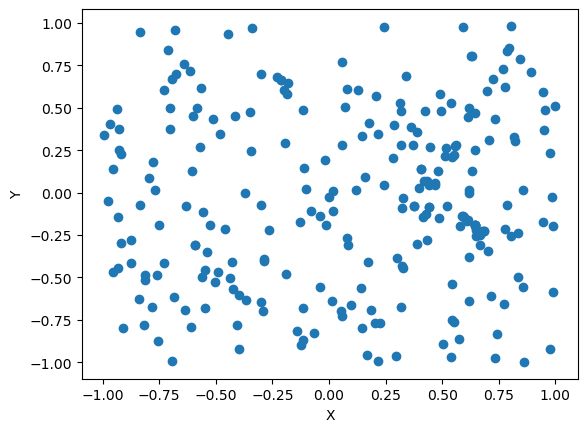

In [78]:
plt.scatter(x=visible["x"], y=visible["y"])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

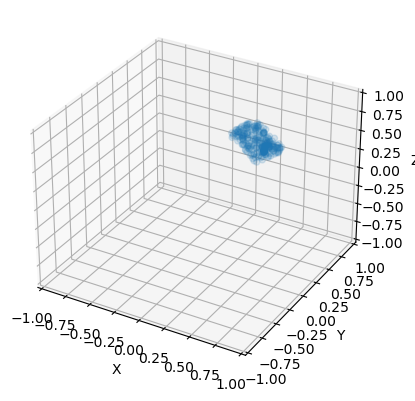

In [79]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

test_df = pd.DataFrame(positions)
test_df = test_df[in_frame]
# Plot the points
ax.scatter(test_df[0], test_df[1], test_df[2], alpha=0.15)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

plt.show()